# Custom Transformers for Piplines in Scikit_Learn

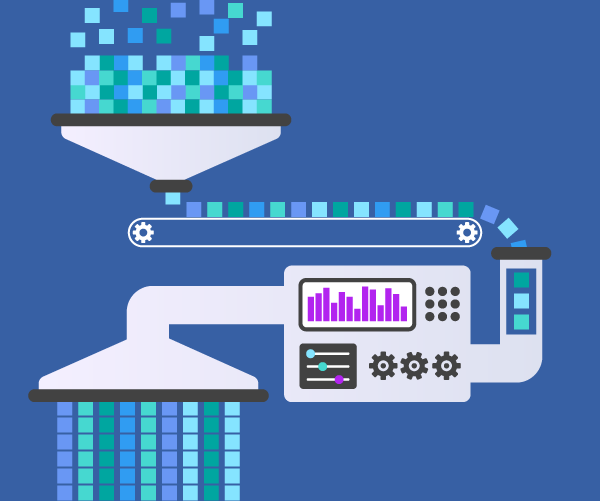

## <div dir="rtl"> اگه با کتابخونه‌ی Scikit_Learn آشنایی دارید، حتما پیش اومده که حین train مدل‌هاتون از Pipeline استفاده کردین. بعنوان مثال فرض کنید تمام داده‌های دیتافریم ما عددی هستند. در قطعه کد زیر ما تعیین کردیم که قبل از فیت شدن لاجستیک رگرسیون روی داده‌هامون، داده‌ها ابتدا scale بشن.


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline(steps=[
                           
("my_scaler" , StandardScaler()),

("my_classifier" , LogisticRegression())

])

## <div dir="rtl"> حالا فرض کنید میخوایم از یک Transformer خاص و مد نظر خودمون به نام multiplierTransformer در Pipeline مون استفاده کنیم که یه ستون جدید (بنام multiple) به دیتافریم مون اضافه کنه که شامل حاصلضرب داده‌های دو ستون دلخواه a و b باشه:

In [3]:
pipeline = Pipeline(steps=[
                           
("my_multiplier" , multiplierTransformer("a","b")),

("my_scaler" , StandardScaler()),

("my_classifier" , LogisticRegression())

])

## <div dir="rtl"> برای این منظور، کلاس زیر رو تعریف میکنیم که دارای دو متد fit و transform بوده، و در سازنده یا constructor اون، ستون‌هایی که قراره بعنوان ورودی بدیم رو ست میکنیم:

In [2]:
class multiplierTransformer () :

    def __init__(self, a , b) :

        self.column1 = a
        self.column2 = b

    def transform(self, x , y=None) :

        x['multiple'] = x[self.column1] * x[self.column2]
        return x

    def fit(self, x, y=None) :
        return self



## <div dir="rtl"> سپس میتونیم از Transformer جدیدمون استفاده کنیم و پایپلاینی که ایجاد کردیم رو روی داده‌هامون فیت کنیم و بعد روی داده‌های تست، predict انجام بدیم :

In [106]:
pipeline.fit(x_train , y_train)
pipeline.predict(x_test)

## <div dir="rtl"> و به این ترتیب با عبور داده‌ها از step اول pipelineمون، در هر سطر از دیتافریم، یه ستون جدید بنام 'multiple' از حاصلضرب دو ستون a و b ایجاد میشه. و میتونیم ترنسفورمری که ساختیم رو  به تنهایی(میخوایم فقط خروجی ترنسفور رو چک کنیم) روی یه دیتافریم ساختگی امتحان کنیم:

In [4]:
import pandas as pd

df = pd.DataFrame({
    "col_1" : [0 , 3 , 4 , 9],
    "col_2" : [8 , 4 , 1 , 0],
    "col_3" : [1 , 2 , 3 , 4],
    "col_4" : [5 , 6 , 7 , 8],
    "class" : [0 , 1 , 0 , 1]
})

x_train = df.drop('class', axis=1)

y_train = df['class']


pipeline = Pipeline(steps = [

("my_multiplier" , multiplierTransformer("col_3" , "col_4"))             

])

pipeline.fit_transform(x_train)

,col_1,col_2,col_3,col_4,multiple
0,0,8,1,5,5
1,3,4,2,6,12
2,4,1,3,7,21
3,9,0,4,8,32


## <div dir="rtl">*در مثال بالا ما متد fit_transform رو فراخوانی کردیم تا خروجی رو ببینیم و در پایپلاینمون هیچ estimator ای نبود(مثل LogisticRegression)، چون estimatorها متد transform ندارن.

## <div dir="rtl">درواقع وقتی متد fit رو در پایپلاین فراخوانی می‌کنیم، متد fit مربوط به Transformerهای حاضر در pipeline  فراخوانی میشه. و با فراخوانی متد predict مربوط به pipline، تنها متد transform مربوط به Transformerهای حاضر در pipline فراخوانی میشه.


## <div dir="rtl">متد fit اونجاییه که فاز "یادگیری (learning)" اتفاق میوفته و پارامترهای مدلمون و همچنین Transformerهای حاضر در pipeline ، در متد fit ایجاد میشن. 

## <div dir="rtl">حالا بعنوان مثال فرض کنید بخوایم در ترسنفورمری که ساختیم، به اون حاصلضربمون(ضرب دو ستون a و b) میانگین داده‌های دو ستون رو اضافه کنیم و اینبار حاصل رو در ستون "multipleAndMeans" قرار بدیم. برای این منظور باید عملیات بدست آوردن میانگین‌ها رو در متد "fit" انجام بدیم تا وقتی متد transform فراخوانی شد، این مقادیر(میانگین اعداد دو ستون) رو داشته باشیم:

In [5]:
class multiplierTransformer() :

    def __init__(self, a , b) :

        self.column1 = column1
        self.column2 = column2


    def transform(self, X , y=None) :

        X['multipleAndMeans'] = X[self.column1] * X[self.column2] + self.mean1 + self.mean2
        return X


    def fit(self, X , y=None) :

        self.mean1 = X[self.column1].mean()
        self.mean2 = X[self.column2].mean()
        return self

## امیدوارم مفید واقع بشه